<a href="https://colab.research.google.com/github/BarryLiu-97/Tensorflow-Tutorial/blob/master/basic/tf_exp_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多元逻辑回归

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
TRAIN_URL = 'http://download.tensorflow.org/data/iris_training.csv'
train_path = tf.keras.utils.get_file(TRAIN_URL.split('/')[-1], TRAIN_URL)  #加载数据集

TEST_URL = 'http://download.tensorflow.org/data/iris_test.csv'
test_path = tf.keras.utils.get_file(TEST_URL.split('/')[-1],TEST_URL)

In [0]:
df_iris = pd.read_csv(train_path, header=0)

In [0]:
iris = np.array(df_iris)
iris.shape   #0-3维度是属性，第四个维度是标签
df_iris_test = pd.read_csv(test_path,header=0)
iris_test = np.array(df_iris_test)

In [0]:
train_x = iris[:,0:2] #提取第0个第1个属性
train_y = iris[:,4]  #标签
test_x = iris_test[:,0:2]
test_y = iris_test[:,4]

In [6]:
train_x.shape, train_y.shape

((120, 2), (120,))

In [7]:
x_train = train_x[train_y < 2]
y_train = train_y[train_y < 2] #提取出标签为0和1的样本 
num = len(x_train)

x_test = test_x[test_y < 2]
y_test = test_y[test_y < 2] #提取出标签为0和1的样本 
num_test = len(x_test)

print(np.mean(x_train),'\n',np.mean(x_test))

4.264743589743589 
 4.345454545454546


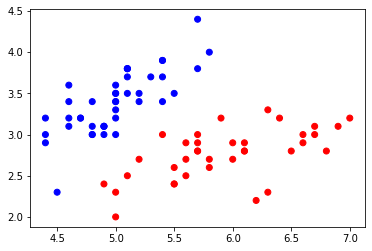

In [8]:
cm_pt = mpl.colors.ListedColormap(['blue','red'])  #自己定义色彩方案
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cm_pt)
plt.show()

可以看出这两个属性的尺度相同，无需归一化，可以直接中心化。

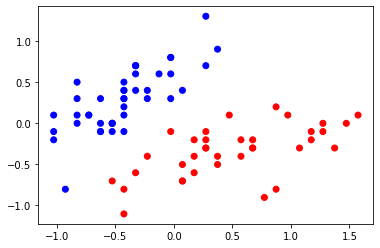

In [9]:
#属性中心化
x_train = x_train-np.mean(x_train,axis=0) 
x_test = x_test-np.mean(x_test,axis=0)  
#对每个属性中心化，就是按列中心化
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
plt.show()

In [0]:
x0_train = np.ones(num).reshape(-1,1)
X = tf.cast(tf.concat((x0_train, x_train), axis=1),tf.float32)
Y = tf.cast(y_train.reshape(-1,1),tf.float32)

x0_test = np.ones(num_test).reshape(-1,1)
X_test = tf.cast(tf.concat((x0_test,x_test),axis=1),dtype=tf.float32)
Y_test = tf.cast(y_test.reshape(-1,1),dtype=tf.float32)

In [11]:
X.shape, Y.shape

(TensorShape([78, 3]), TensorShape([78, 1]))

In [0]:
learn_rate = 0.2
epoch = 120
display_step = 30
np.random.seed(1)
W = tf.Variable(np.random.randn(3,1),dtype=tf.float32)

In [16]:
ce = []  #交叉熵损失
acc = []
ce_test = []
acc_test = []

for i in range(epoch+1):
  with tf.GradientTape() as tape:
    PRED_train = 1/(1+tf.exp(-tf.matmul(X,W)))
    Loss_train = -tf.reduce_mean(Y*tf.math.log(PRED_train)+(1-Y)*tf.math.log(1-PRED_train))

    PRED_test = 1/(1+tf.exp(-tf.matmul(X_test,W)))
    Loss_test = -tf.reduce_mean(Y_test*tf.math.log(PRED_test)+(1-Y_test)*tf.math.log(1-PRED_test))

  accuracy_train = tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED_train.numpy()<0.5,0.,1.),Y),tf.float32))
  accuracy_test = tf.reduce_mean(tf.cast(tf.equal(tf.where(PRED_test.numpy()<0.5,0.,1.),Y_test),tf.float32))
  
  ce.append(Loss_train)
  acc.append(accuracy_train)
  ce_test.append(Loss_test)
  acc_test.append(accuracy_test)

  dL_dW = tape.gradient(Loss_train,W)
  W.assign_sub(learn_rate*dL_dW)

  if i % display_step == 0:
    print('i:%i, Train Acc:%f, Test Loss:%f, Test Acc:%f, Train Loss:%f'%(i,accuracy_train,Loss_train,accuracy_test,Loss_test))

i:0, Train Acc:0.461538, Test Loss:1.039044, Test Acc:0.636364, Train Loss:0.754057
i:30, Train Acc:0.974359, Test Loss:0.419344, Test Acc:1.000000, Train Loss:0.385821
i:60, Train Acc:0.987179, Test Loss:0.285561, Test Acc:0.954545, Train Loss:0.313071
i:90, Train Acc:1.000000, Test Loss:0.227177, Test Acc:0.863636, Train Loss:0.271092
i:120, Train Acc:1.000000, Test Loss:0.192279, Test Acc:0.863636, Train Loss:0.241654


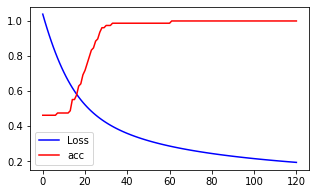

In [17]:
plt.figure(figsize=(5,3))
plt.plot(ce,color='b',label='Loss')
plt.plot(acc,color='r',label='acc')
plt.legend()
plt.show()

### 绘制线性分类器的决策边界

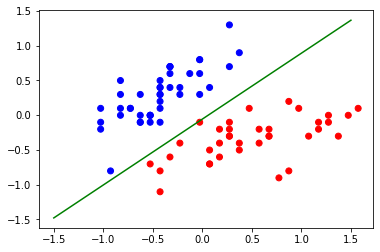

In [18]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt)
x_ = [-1.5,1.5]

#将下面三行放在if i % display_step的判断语句中可以可视化训练过程中决策边界的变化
y_ = -(W[1]*x_+W[0])/W[2]
plt.plot(x_,y_,color='g')
plt.show()